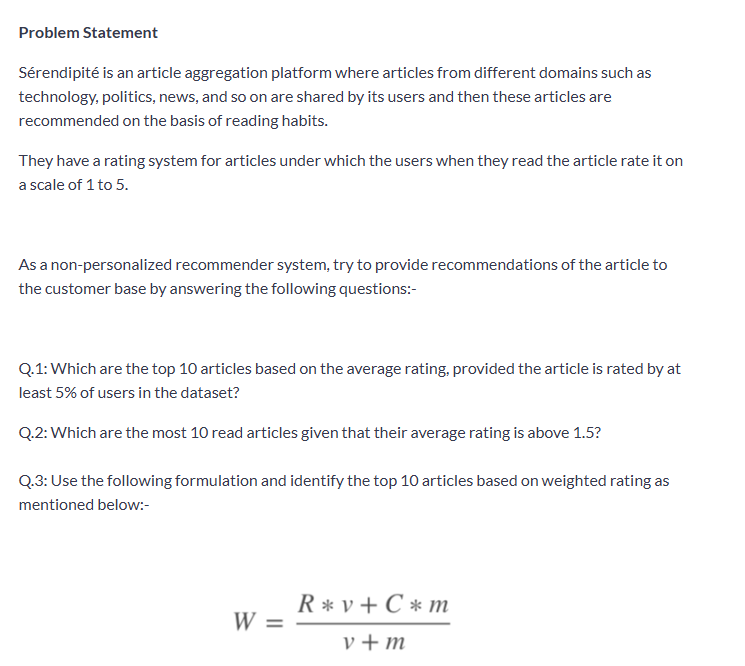

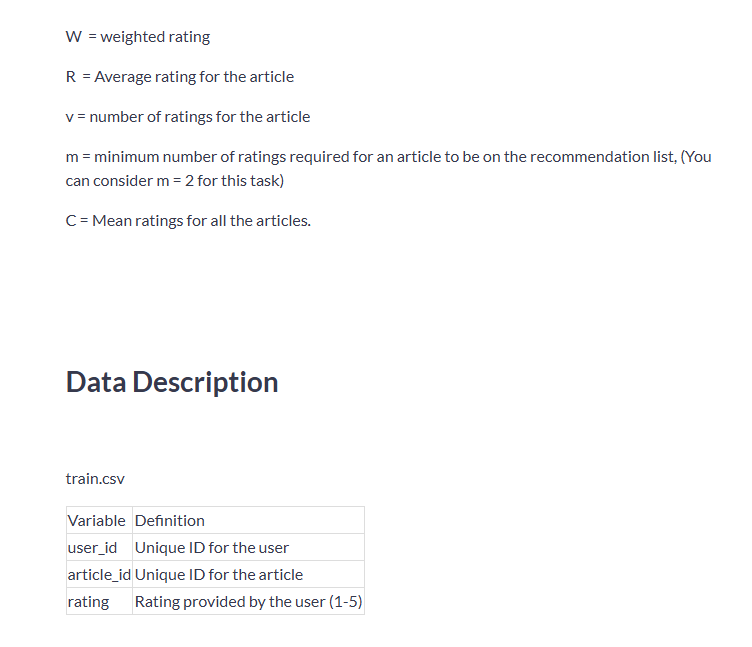

## Connect to Google Drive

In [1]:
# Upload data from drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1. Reading Dataset <a class="anchor" id="Reading-Dataset"></a>


In [2]:
import pandas as pd
import numpy as np

In [3]:
#Reading training file:
users = pd.read_csv('/content/drive/MyDrive/Colab-Notebooks/Recommender_Systems/Serendipite_Non_Personalized_Recommendation_Assignment/train-201102-092914.csv')


## 2. Basic Exploration <a class="anchor" id="Basic-Exploration"></a>

Let us look at each table to understand what we are dealing with here

### Exploring user data

In [4]:
# shape of the users data
print(users.shape)
# view the users data
users.head()

(16731, 3)


,user_id,article_id,rating
0,1,456,1
1,1,2934,1
2,1,82,1
3,1,1365,1
4,1,221,1


In [5]:
# View any missing values n the dataframe
pd.isnull(users).sum()

,0
user_id,0
article_id,0
rating,0


From above we see that there are no missing values in the dataset.

#### Unique Rating Values

In [78]:
users['rating'].unique()

array([1, 2, 4, 5, 3])

From above we see that there are 5 rating values expected i.e  1, 2, 3, 4, 5

#### Unique Users in the Dataset

In [ ]:
unique_users = users['user_id'].nunique()
unique_users

907

#### Unique Articles in the Dataset

In [ ]:
unique_articles = users['article_id'].nunique()
unique_articles

2529

#### Articles Rated By Unique User

In [ ]:
unique_articles_per_user = users.groupby('user_id').nunique()
unique_articles_per_user.sort_values(by='article_id', ascending=False)

,article_id,rating
user_id,,
698,146,5
525,134,5
503,134,5
423,123,4
14,116,4
...,...,...
30,5,1
23,5,1
1062,5,2


In [ ]:
unique_articles_per_user.value_counts().sort_values(ascending=False)

article_id  rating
6           1         67
            2         56
5           1         44
8           1         34
7           1         27
                      ..
99          5          1
110         5          1
116         4          1
123         4          1
146         5          1
Name: count, Length: 206, dtype: int64

#### Number of Unique Users Provided Ratings to Articles

In [ ]:
num_users_rating_article = unique_articles_per_user.value_counts()
num_users_rating_article.sort_index(ascending=False)

article_id  rating
146         5          1
134         5          2
123         4          1
116         4          1
110         5          1
                      ..
6           2         56
            1         67
5           3          6
            2         26
            1         44
Name: count, Length: 206, dtype: int64

In [ ]:
num_users_rating_article.shape

(206,)

So, we have 16731 records in the dataset and each record has 3 features, i.e. user_id, article_id, and rating. We have no missing values in the user data. And there are 907 unique users and 2529 unique articles in the dataset. There are total of 206 article ratings available.

#### Ratings Matrix Using a Pivot Table

In [6]:
users_pivot = users.pivot(index='user_id', columns='article_id', values='rating')
users_pivot

article_id,1,3,4,5,6,7,8,9,10,11,...,2963,2964,2965,2966,2968,2969,2970,2974,2975,2976
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1083,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1084,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1085,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# View if any missing values in the dataframe.
users_pivot.isna().sum()

,0
article_id,
1,905
3,900
4,898
5,906
6,895
...,...
2969,895
2970,898
2974,900


In [40]:
# Fill NaN values with 0
users_pivot = users_pivot.fillna(0)
users_pivot

article_id,1,3,4,5,6,7,8,9,10,11,...,2963,2964,2965,2966,2968,2969,2970,2974,2975,2976
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1083,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1084,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Non Personalized Average Rating for an Article using Pivot Table

In [108]:
users_pivot.mean(axis=0).sort_values(ascending=False).head(10)

,0
article_id,
967,0.194046
467,0.136714
1425,0.120176
2781,0.112459
1433,0.110254
1249,0.109151
2660,0.106946
456,0.105843
1562,0.103638


The article id 967 seems to have recieved highest average rating using the pivot table calculations.

#### Non Personalized Recommender System using Rating Count.

In [101]:
users_rating_count_pivot = users_pivot.apply(users_pivot.value_counts)
users_rating_count_pivot

article_id,1,3,4,5,6,7,8,9,10,11,...,2963,2964,2965,2966,2968,2969,2970,2974,2975,2976
0.0,905.0,900.0,898.0,906.0,895.0,903.0,905.0,899.0,903.0,905.0,...,903.0,900.0,906.0,895.0,884.0,895.0,898.0,900.0,906.0,872.0
1.0,1.0,7.0,4.0,NaN,8.0,4.0,2.0,7.0,2.0,1.0,...,3.0,5.0,1.0,10.0,16.0,7.0,8.0,5.0,1.0,24.0
2.0,1.0,NaN,NaN,1.0,2.0,NaN,NaN,NaN,1.0,1.0,...,1.0,1.0,NaN,2.0,5.0,1.0,NaN,1.0,NaN,10.0
3.0,NaN,NaN,3.0,NaN,2.0,NaN,NaN,NaN,1.0,NaN,...,NaN,1.0,NaN,NaN,NaN,3.0,1.0,1.0,NaN,NaN
4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,2.0,1.0,NaN,NaN,NaN,1.0


Since we do not have Rating 0, we would drop that index.

In [102]:
users_rating_count_pivot.drop(0.0, axis=0, inplace=True)
users_rating_count_pivot

article_id,1,3,4,5,6,7,8,9,10,11,...,2963,2964,2965,2966,2968,2969,2970,2974,2975,2976
1.0,1.0,7.0,4.0,NaN,8.0,4.0,2.0,7.0,2.0,1.0,...,3.0,5.0,1.0,10.0,16.0,7.0,8.0,5.0,1.0,24.0
2.0,1.0,NaN,NaN,1.0,2.0,NaN,NaN,NaN,1.0,1.0,...,1.0,1.0,NaN,2.0,5.0,1.0,NaN,1.0,NaN,10.0
3.0,NaN,NaN,3.0,NaN,2.0,NaN,NaN,NaN,1.0,NaN,...,NaN,1.0,NaN,NaN,NaN,3.0,1.0,1.0,NaN,NaN
4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,2.0,1.0,NaN,NaN,NaN,1.0


Now lets fill the NaN values with 0 count.

In [103]:
users_rating_count_pivot.fillna(0, inplace=True)
users_rating_count_pivot

article_id,1,3,4,5,6,7,8,9,10,11,...,2963,2964,2965,2966,2968,2969,2970,2974,2975,2976
1.0,1.0,7.0,4.0,0.0,8.0,4.0,2.0,7.0,2.0,1.0,...,3.0,5.0,1.0,10.0,16.0,7.0,8.0,5.0,1.0,24.0
2.0,1.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,1.0,1.0,...,1.0,1.0,0.0,2.0,5.0,1.0,0.0,1.0,0.0,10.0
3.0,0.0,0.0,3.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,3.0,1.0,1.0,0.0,0.0
4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,1.0


Here we count the ratings for the articles given by the users and the order the ratings in decending order with highest rating at the top.

Now let's calculate the total count of rating each article recieved.

In [106]:
users_rating_count_pivot.sum(axis=0).sort_values(ascending=False).head(10)

,0
article_id,
967,122.0
1425,91.0
467,90.0
2660,73.0
1562,71.0
456,69.0
221,64.0
1433,61.0
1904,61.0


Now from the above we see article 967 recieved 122 rating counts and it's an article recieving highest number of ratings.

## **3. Non Personalised Recommender Systems using average ratings**

### **Q1: Which are the top 10 articles based on average ratings, provided the articles are rated by atleast 5% of the users in the database.**

#### Calculate 5% of Total Unique Users

In [ ]:
percent_users_5 = round(users['user_id'].nunique() * 0.05)
percent_users_5

45

#### Create new Dataframe with article_id, average_rating, and rating_count

In [110]:
articles_average_rating_count = pd.DataFrame(users_pivot.mean(axis=0), columns=['average_rating'])
articles_average_rating_count['rating_count'] = users_rating_count_pivot.sum(axis=0)
articles_average_rating_count

,average_rating,rating_count
article_id,,
1,0.003308,2.0
3,0.007718,7.0
4,0.025358,9.0
5,0.002205,1.0
6,0.019846,12.0
...,...,...
2969,0.025358,12.0
2970,0.012128,9.0
2974,0.011025,7.0


We need top 10 average rating articles that have rating count or user count > 45

#### Articles IDs for articles that have rating count > 45

In [116]:
articles_average_rating_count_5pc = articles_average_rating_count[articles_average_rating_count['rating_count'] > percent_users_5]
articles_average_rating_count_5pc.sort_values(by='rating_count', ascending=False).head(10)

,average_rating,rating_count
article_id,,
967,0.194046,122.0
1425,0.120176,91.0
467,0.136714,90.0
2660,0.106946,73.0
1562,0.103638,71.0
456,0.105843,69.0
221,0.100331,64.0
1433,0.110254,61.0
1904,0.088203,61.0


#### Average ratings Articles recieved by Users

In [112]:
articles_average_rating_count.shape

(2529, 2)

In [122]:
mean_ratings_articles = articles_average_rating_count['average_rating'].sum()/ articles_average_rating_count.shape[0]
mean_ratings_articles

np.float64(0.010605095555285262)

#### Top 10 Articles Recieving Average Ratings(0.011 and above)

In [123]:
top_10_articles_with_above_average_rating = articles_average_rating_count[articles_average_rating_count['average_rating'] >= mean_ratings_articles]
top_10_articles_with_above_average_rating.sort_values(by='average_rating', ascending=False).head(10)

,average_rating,rating_count
article_id,,
967,0.194046,122.0
467,0.136714,90.0
1425,0.120176,91.0
2781,0.112459,60.0
1433,0.110254,61.0
1249,0.109151,58.0
2660,0.106946,73.0
456,0.105843,69.0
1562,0.103638,71.0


#### **Q1 - Which are the Top 10 articles based on average ratings (0.011 and above) with atleast 5% (45) users.**

In [117]:
top_10_average_rating_articles_with_atleast_5_pc_users = top_10_articles_with_above_average_rating.sort_values(by='average_rating', ascending=False).head(10)
top_10_average_rating_articles_with_atleast_5_pc_users

,average_rating,rating_count
article_id,,
967,0.194046,122.0
467,0.136714,90.0
1425,0.120176,91.0
2781,0.112459,60.0
1433,0.110254,61.0
1249,0.109151,58.0
2660,0.106946,73.0
456,0.105843,69.0
1562,0.103638,71.0


### **Q2 - Which are the 10 Most Read Articles with Average Rating above 1.5**

In [119]:
top_unique_article_above_1_5_mean_rating_by_users = articles_average_rating_count[articles_average_rating_count['average_rating'] > 1.5]
top_unique_article_above_1_5_mean_rating_by_users.head(10)

,average_rating,rating_count
article_id,,


### **Q3 - Articles based on Weighted Ratings**

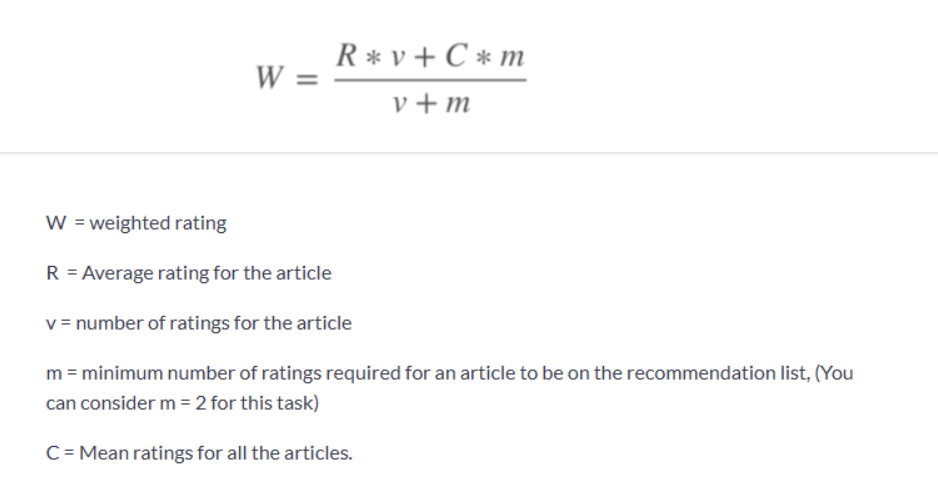

#### R = Average Rating for the Artcile

In [120]:
R = articles_average_rating_count['average_rating']
R

,average_rating
article_id,
1,0.003308
3,0.007718
4,0.025358
5,0.002205
6,0.019846
...,...
2969,0.025358
2970,0.012128
2974,0.011025


#### v= Number of Ratings for the Article

In [121]:
v = articles_average_rating_count['rating_count']
v

,rating_count
article_id,
1,2.0
3,7.0
4,9.0
5,1.0
6,12.0
...,...
2969,12.0
2970,9.0
2974,7.0


#### C= Mean Ratings for All Articles

In [124]:
C = mean_ratings_articles
C

np.float64(0.010605095555285262)

#### m = Minimum Number of Ratings Needed for an Article to be on the Reccomendations list

In [125]:
m = 2

#### **Q3 - Top 10 articles based on Weighted Rating**

In [126]:
W = (R*v + C*m)/(v+m)
W.sort_values(ascending=False).head(10)

,0
article_id,
967,0.191088
467,0.133973
1425,0.117820
2781,0.109173
1433,0.107090
1249,0.105866
2660,0.104377
456,0.103161
1562,0.101090
